# Import


In [82]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import sklearn
import statistics 
#url_nathan = "/content/sample_data/spambase.data"
data = pd.read_csv("spambase.data")
#data = pd.read_csv("/content/sample_data/spambase.data")
type(data)

pandas.core.frame.DataFrame

Nous avons commencé par regarder la forme du dataset et des exemples de données 

In [83]:
print(data.shape)
data.head()


(4600, 58)


,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


Ensuite, nous avons regardé le type de chaque colonne afin de les crosschecker avec la documentation fournie

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

Ici nous pouvons voir un début d'analyse de chaque colonne dans le but de mieux situer les valeurs possibles 

In [85]:
data.describe()


,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,0.059837,0.541680,0.093950,0.058639,0.049215,0.248833,0.142617,0.184504,1.662041,0.085596,0.809728,0.121228,0.101667,0.094289,0.549624,0.265441,0.767472,0.124872,0.098937,0.102874,0.064767,0.047059,0.097250,0.047846,0.105435,0.097498,0.136983,0.013204,0.078646,0.064848,0.043676,0.132367,0.046109,0.079213,0.301289,0.179863,0.005446,0.031876,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,0.201565,0.861791,0.301065,0.335219,0.258871,0.825881,0.444099,0.530930,1.775669,0.509821,1.200938,1.025866,0.350321,0.442681,1.671511,0.887043,3.367639,0.538631,0.593389,0.456729,0.403435,0.328594,0.555966,0.329480,0.532315,0.402664,0.423493,0.220675,0.434718,0.349953,0.361243,0.766900,0.223835,0.622042,1.011787,0.911214,0.076283,0.285765,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

Pour des soucis de compréhension nous avons renommé toute les colonnes vérifiant comme nous avons pu que les colonnes soient dans le même ordre que dans la documentation en regardant le type des capital_run_length_longest, capital_run_length_total et la target étant les seuls integer et capital_run_length_longest < capital_run_length_total

In [86]:
data.rename(columns={ '0':'word_freq_make'	,'0.64':'word_freq_address' ,'0.64.1':'word_freq_all' ,'0.1':'word_freq_3d' ,'0.32':'word_freq_our' 	,'0.2':'word_freq_over'	,'0.3':'word_freq_remove' 	,'0.4':'word_freq_internet' ,	'0.5':'word_freq_order', 	'0.6':'word_freq_mail' 	,'0.7':'word_freq_receive' ,	'0.64.2':'word_freq_will' 	,'0.8':'word_freq_people' 	,'0.9':'word_freq_report' 	,'0.10':'word_freq_addresses' ,'0.32.1':'word_freq_free' 	,'0.11':'word_freq_business' ,'1.29':'word_freq_email' 	,'1.93':'word_freq_you' ,'0.12':'word_freq_credit' ,	'0.96':'word_freq_your' ,'0.13':'word_freq_font' 	,'0.14':'word_freq_000'	,'0.15':'word_freq_money' 	,'0.16':'word_freq_hp'	,'0.17':'word_freq_hpl' ,'0.18':'word_freq_george' ,'0.19':'word_freq_650','0.20':'word_freq_lab' 	,'0.21':'word_freq_labs' 	,'0.22':'word_freq_telnet'	,'0.23':'word_freq_857' 	,'0.24':'word_freq_data' ,	'0.25':'word_freq_415' 	,'0.26':'word_freq_85' 	,'0.27':'word_freq_technology'	,'0.28':'word_freq_1999','0.29':'word_freq_parts','0.30' : 'word_freq_pm' ,	'0.31':'word_freq_direct' 	,'0.32.2':'word_freq_cs' , 	'0.33':'word_freq_meeting' 	,'0.34':'word_freq_original' , 	'0.35' : 'word_freq_project',	'0.36' : 'word_freq_re','1': 'Target', '3.756' : 'capital_run_length_average', '61':'capital_run_length_longest' , '278': 'capital_run_length_total', '0.44': 'char_freq_#' , '0.43':'char_freq_$', '0.778' : 'char_freq_!' , '0.42' : 'char_freq_[', '0.41':'char_freq_(', '0.40' : 'char_freq_;', '0.39': 'word_freq_conference', '0.38' :'word_freq_table', '0.37': 'word_freq_edu'  }, inplace=True)
data.describe()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Target
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,0.059837,0.541680,0.093950,0.058639,0.049215,0.248833,0.142617,0.184504,1.662041,0.085596,0.809728,0.121228,0.101667,0.094289,0.549624,0.265441,0.767472,0.124872,0.098937,0.102874,0.064767,0.047059,0.097250,0.047846,0.105435,0.097498,0.136983,0.013204,0.078646,0.064848,0.043676,0.132367,0.046109,0.079213,0.301289,0.179863,0.005446,0.031876,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,0.201565,0.861791,0.301065,0.335219,0.258871,0.825881,0.444099,0.530930,1.775669,0.509821,1.200938,1.025866,0.350321,0.442681,1.671511,0.887043,3.367639,0.538631,0.593389,0.456729,0.403435,0.328594,0.555966,0.329480,0.532315,0.402664,0.423493,0.220675,0.434718,0.349953,0.361243,0.766900,0.223835,0.622042,1.011787,0.911214,0.076283,0.285765,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

Verifions qu'il n'y a pas de valeur nulle ou non disponible ce qui serait succeptible de fausser les modèles et les différentes visualisations

In [87]:
data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [88]:
data.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Il y a 2788 mails qui ne sont pas des spams et 1812 qui le sont dans le dataset

Nous voyons aussi qu'il y a une vraie difference au niveau des moyennes de toutes les colonnes contrairement aux quartiles qui nous donne aucune information étant donné que la majeur partie des valeurs est 0 en tout cas pour la majorité des colonnes.

In [89]:
data[data['Target']== 1].describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Target
count,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.0
mean,0.152423,0.164387,0.403664,0.164763,0.514062,0.174972,0.275557,0.208256,0.170155,0.350701,0.118499,0.549923,0.143626,0.083620,0.112141,0.518471,0.287666,0.318692,2.264724,0.205635,1.380602,0.238168,0.247191,0.212997,0.017489,0.009178,0.001551,0.018808,0.000684,0.005971,0.001275,0.000519,0.014570,0.001777,0.006932,0.029531,0.043493,0.004713,0.012434,0.036738,0.000055,0.002445,0.008455,0.006247,0.125160,0.014735,0.001220,0.002103,0.020584,0.109030,0.008203,0.513567,0.174575,0.078921,9.522345,104.417219,470.725717,1.0
std,0.310710,0.348836,0.480826,2.219696,0.707375,0.321990,0.572232,0.544992,0.354880,0.631505,0.251014,0.641251,0.350465,0.318948,0.387230,1.013439,0.626406,0.665912,1.567298,0.788595,1.227684,1.441123,0.519266,0.600739,0.160745,0.099418,0.033405,0.304755,0.012649,0.103321,0.035708,0.015610,0.112151,0.035983,0.065921,0.147707,0.268497,0.050320,0.089561,0.152099,0.002349,0.027481,0.050257,0.061190,0.322846,0.133958,0.018515,0.026828,0.091645,0.282208,0.047462,0.744362,0.360555,0.612107,49.859762,299.365850,825.296526,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000,0.000000,0.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.094000,0.000000,0.000000,2.323500,15.000000,92.750000,1.0
50%,0.000000,0.000000,0.300000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.430000,0.000000,0.000000,0.000000,0.140000,0.000000,0.000000,2.185000,0.000000,1.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [90]:
data[data['Target']== 0].describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Target
count,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.0
mean,0.073479,0.244466,0.200581,0.000886,0.181040,0.044544,0.009383,0.038415,0.038049,0.167170,0.021711,0.536324,0.061664,0.042403,0.008318,0.073587,0.048346,0.097292,1.270341,0.007579,0.438702,0.045226,0.007088,0.017138,0.895473,0.431994,1.265265,0.193806,0.162794,0.165854,0.106033,0.077306,0.150986,0.077787,0.169455,0.141671,0.197744,0.018723,0.121679,0.083117,0.072027,0.216808,0.070581,0.126636,0.415760,0.287184,0.008192,0.051227,0.050281,0.158578,0.022684,0.109984,0.011648,0.021713,2.377301,18.214491,161.470947,0.0
std,0.297838,1.633223,0.502959,0.021334,0.614521,0.222888,0.110467,0.247238,0.198517,0.643197,0.149696,0.978915,0.259059,0.344470,0.094341,0.616574,0.218882,0.397108,1.793636,0.096685,1.025167,0.610269,0.067733,0.271579,2.071212,1.105239,4.252581,0.637442,0.755368,0.572028,0.513252,0.419157,0.703246,0.419546,0.674060,0.498420,0.489621,0.280421,0.549483,0.431521,0.461840,0.975665,0.281983,0.793954,1.260273,1.152926,0.096749,0.365153,0.303372,0.260604,0.134927,0.820859,0.069647,0.243912,5.113685,39.084792,355.738403,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.384000,4.000000,18.750000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.510000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

En comparant les moyennes nous pouvons facilement remarquer que certaine colonnes fluctuent extremement selon si c'est un spam ou non. 

Notamment la fréquence des mots 3d, remove, 000 qui sont respectivement 185,29 et 34 fois plus fréquent dans des mails de spams.

Ainsi que la fréquence des caractères '$', '!', '#' qui sont respectivement environt 15, 5 et 4 fois plus fréquent dans des mails de spams 


In [91]:
for column in data.columns :
  if(column != 'Target'):
    print(column + ' : ' + str(data[data['Target']== 1][column].mean() / data[data['Target']== 0][column].mean())) 


word_freq_make : 2.074365867477688
word_freq_address : 0.6724358748262079
word_freq_all : 2.012475433892349
word_freq_3d : 185.9750560813649
word_freq_our : 2.839490285514949
word_freq_over : 3.9280382352256304
word_freq_remove : 29.367508320338057
word_freq_internet : 5.421269140474438
word_freq_order : 4.4720099620761875
word_freq_mail : 2.097869551376737
word_freq_receive : 5.458036060421386
word_freq_will : 1.0253563514358475
word_freq_people : 2.32915779401477
word_freq_report : 1.9720302963420253
word_freq_addresses : 13.482099595719037
word_freq_free : 7.0457106218072685
word_freq_business : 5.950082271711351
word_freq_email : 3.27562559892575
word_freq_you : 1.7827689687542747
word_freq_credit : 27.13248585180145
word_freq_your : 3.1470175032031547
word_freq_font : 5.266172923541596
word_freq_000 : 34.87694162175689
word_freq_money : 12.428521729006285
word_freq_hp : 0.019530408548121193
word_freq_hpl : 0.02124496786250267
word_freq_george : 0.0012256500481594107
word_freq_650 

De la meme manière nous remarquons que les fréquences des mots 'cs', 'george', 'lab', '857', 'meeting' sont respectivement 1305, 815, 237, 149, 88 fois plus élevées en moyenne.




In [92]:
#word_freq_cs : 1305.1209469153519
#word_freq_george : 815.8935754147157
#word_freq_lab : 237.889468690702
#word_freq_857 : 149.0202539760066
#word_freq_meeting : 88.68073102720136
for column in data.columns :
  if(column != 'Target'):
    print(column + ' : ' + str(data[data['Target']== 0][column].mean() / data[data['Target']== 1][column].mean()))

word_freq_make : 0.48207503588358963
word_freq_address : 1.4871306505746016
word_freq_all : 0.49690047548351435
word_freq_3d : 0.005377065188583654
word_freq_our : 0.3521758835032067
word_freq_over : 0.25458000663849417
word_freq_remove : 0.03405123747960136
word_freq_internet : 0.18445865240929282
word_freq_order : 0.22361309757363268
word_freq_mail : 0.47667406171358234
word_freq_receive : 0.18321608522366475
word_freq_will : 0.9752706935492818
word_freq_people : 0.42933973926957514
word_freq_report : 0.5070916009023433
word_freq_addresses : 0.07417242343451678
word_freq_free : 0.14193032522580296
word_freq_business : 0.168064903027363
word_freq_email : 0.30528519508699425
word_freq_you : 0.5609251773653872
word_freq_credit : 0.03685618801985316
word_freq_your : 0.31776118149395793
word_freq_font : 0.18989121977549533
word_freq_000 : 0.028672238834616774
word_freq_money : 0.08046009186001193
word_freq_hp : 51.20220591064896
word_freq_hpl : 47.06997000287293
word_freq_george : 815.893

# Data Visualisation

In [93]:
spam = len(data[ data['Target'] == 0 ])

non_spam = len(data[data['Target'] == 1])

print('Nombre de spams: ', spam)
print('Nombre de non spams: ', non_spam)

Nombre de spams:  2788
Nombre de non spams:  1812


([<matplotlib.patches.Wedge at 0x7f55c382f4e0>,
 [Text(-0.35986085278690905, 1.0394710994690899, 'spam: 60%'),
  Text(0.3598608527869091, -1.0394710994690899, 'non spam: 40%')])

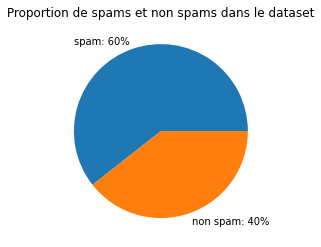

In [94]:
prop = [spam, non_spam]
plt.title('Proportion de spams et non spams dans le dataset')
#sn.barplot(prop, [spam/(spam+non_spam), non_spam/(spam+non_spam)])
plt.pie(prop, labels = ['spam: 60%', 'non spam: 40%'])


Dans un premier temps nous avons voulu afficher les différentes corrélations qui existent entre les attributs de notre data frame. Ainsi nous avons tracé une matrice de corrélation sur l’ensemble des 58 attributs que composent notre data frame cependant le grand nombre d’attributs rends le lecture, la compréhension et l’interprétation compliquée. En revanche tracer cette grande matrice de corrélation nous a permis  de voir grossièrement quels étaient les attributs les plus corrélés.

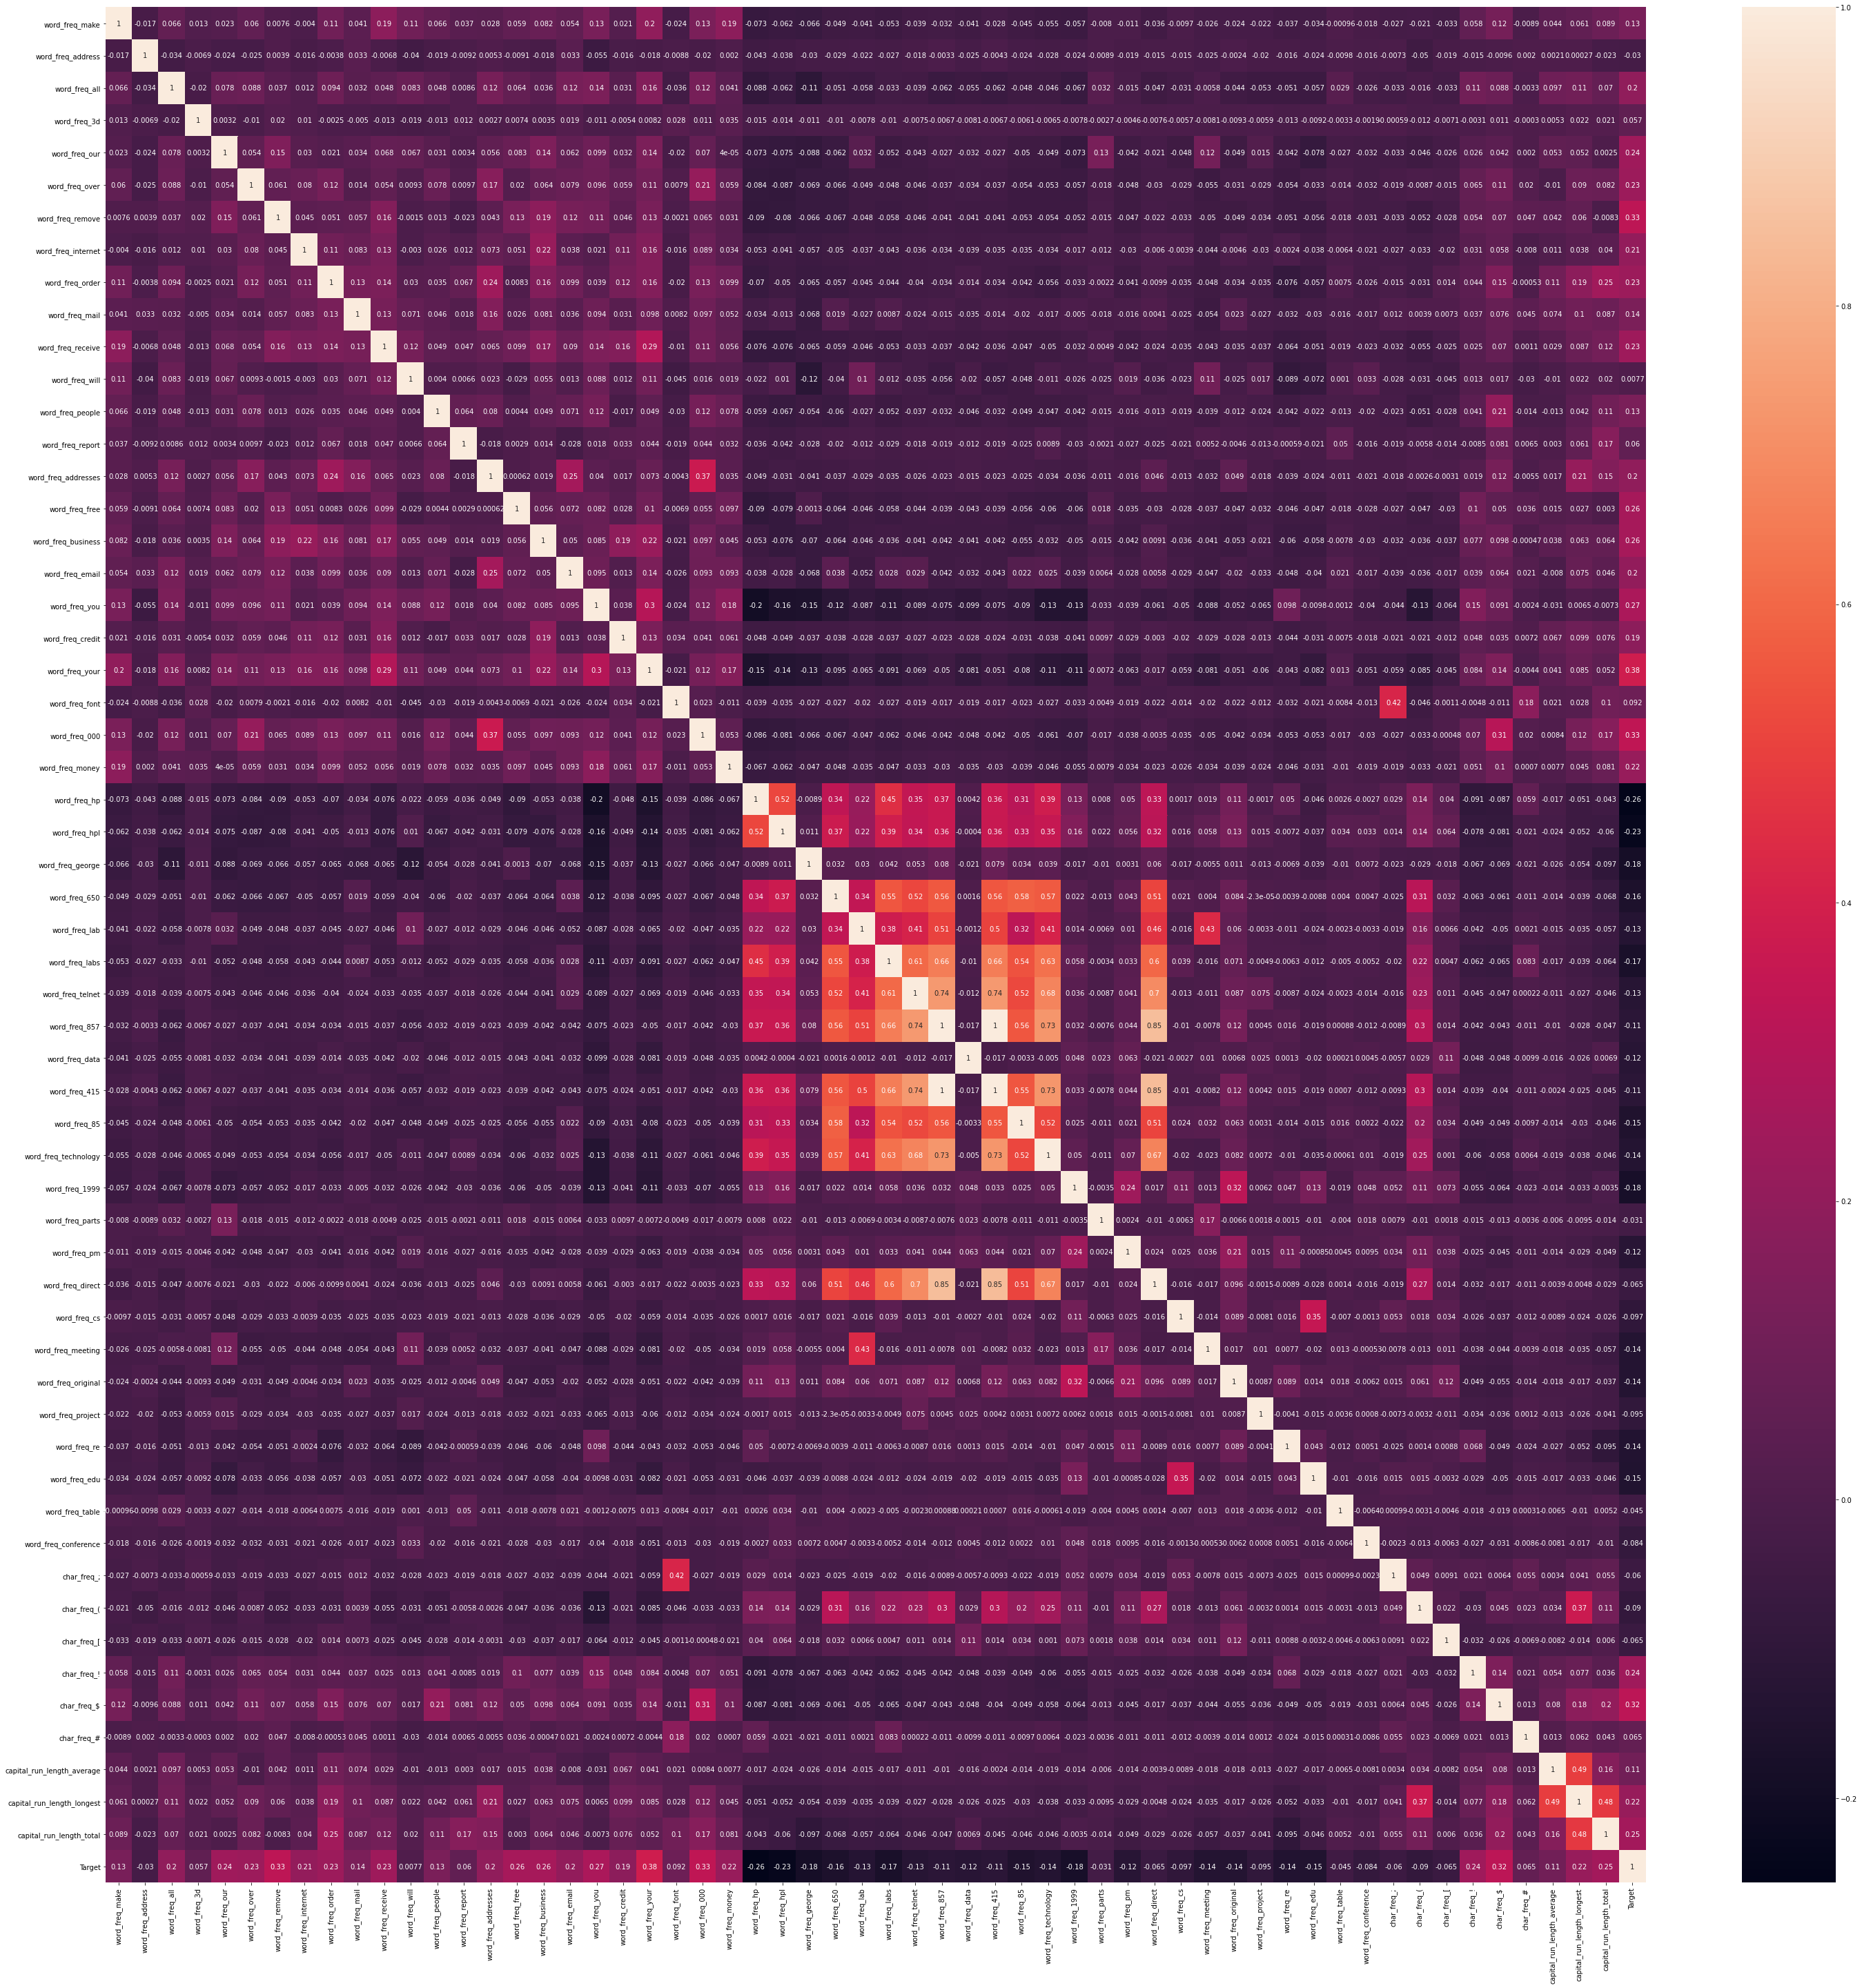

In [95]:
from matplotlib.pyplot import figure
plt.figure(figsize=(50, 50)) 

corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)


Dans un second temps, fort de notre traçage de la grande matrice de corrélation nous avons tracé une deuxième matrice qui cette fois ci contient seulement 16 attributs. Nous observons ainsi des corrélations fortes entre les différents attributs.

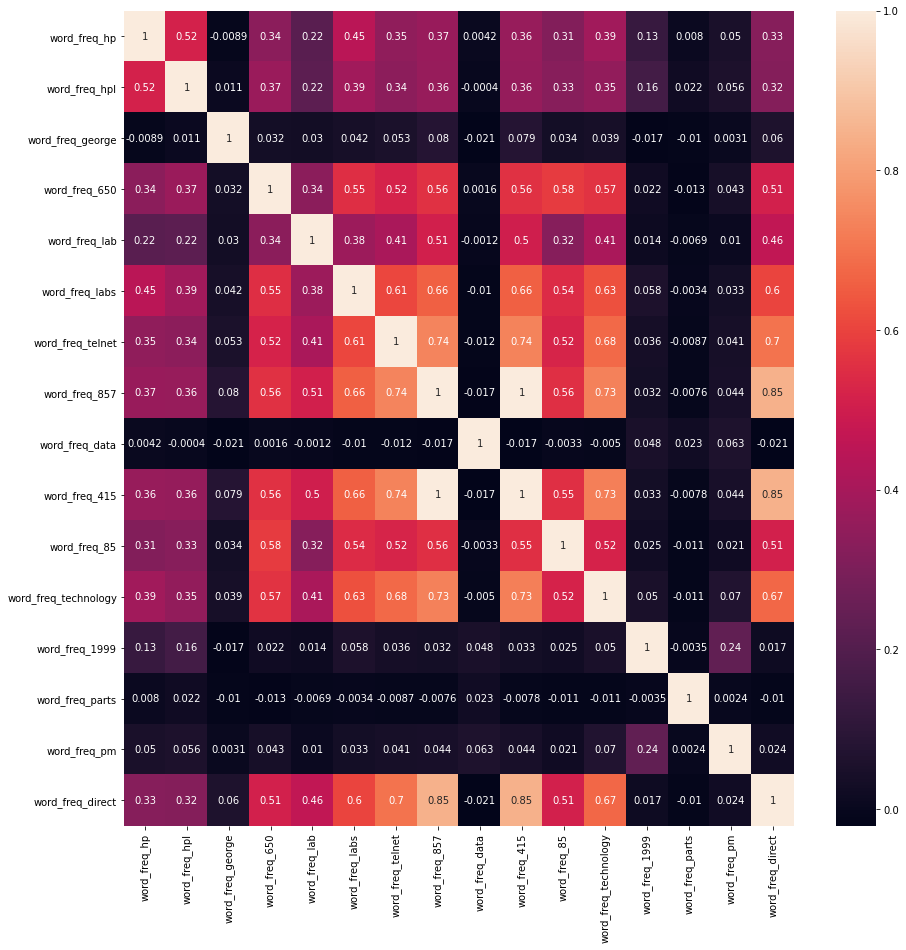

In [96]:
#hp à direct
data_corr = data.iloc[:,24:40]
#data_corr.drop(data_corr.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56]], axis=1) 
data_corr
plt.figure(figsize=(15, 15)) 

corrMatrix_2 = data_corr.corr()
sn.heatmap(corrMatrix_2, annot=True)



Afin de connaître mieux la constitution type d’un mail spam et non spam, nous avons affiché les fréquence moyenne d’apparition des mots contenus respectivement dans un mail spam et non spam.

In [97]:
data_D_0 = data[data['Target']== 0].describe()
data_D_0 = data_D_0.T
data_D_0.drop('capital_run_length_total', inplace = True)
data_D_0.drop('capital_run_length_longest', inplace = True)
data_D_0.drop('capital_run_length_average', inplace = True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text major ticklabel objects>)

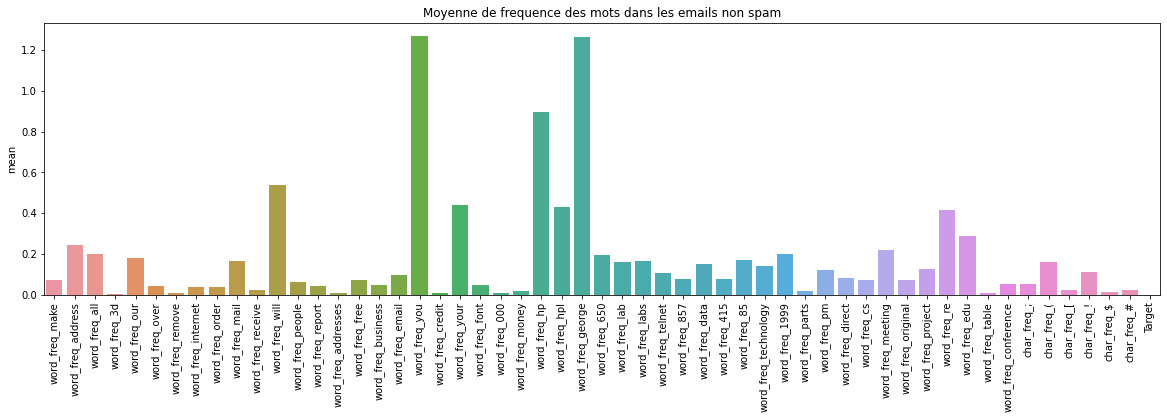

In [98]:
plt.figure(figsize=(20, 5)) 
plt.title('Moyenne de frequence des mots dans les emails non spam')
sn.barplot(data_D_0.index, data_D_0['mean'])
plt.xticks(rotation= 90)


Nous observons que les mots qui apparaissent le plus dans un mail non spam sont « you », « george », « hp », « will »

In [99]:
data_D_1 = data[data['Target']== 1].describe()
data_D_1 = data_D_1.T
data_D_1.drop('capital_run_length_total', inplace = True)
data_D_1.drop('capital_run_length_longest', inplace = True)
data_D_1.drop('capital_run_length_average', inplace = True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text major ticklabel objects>)

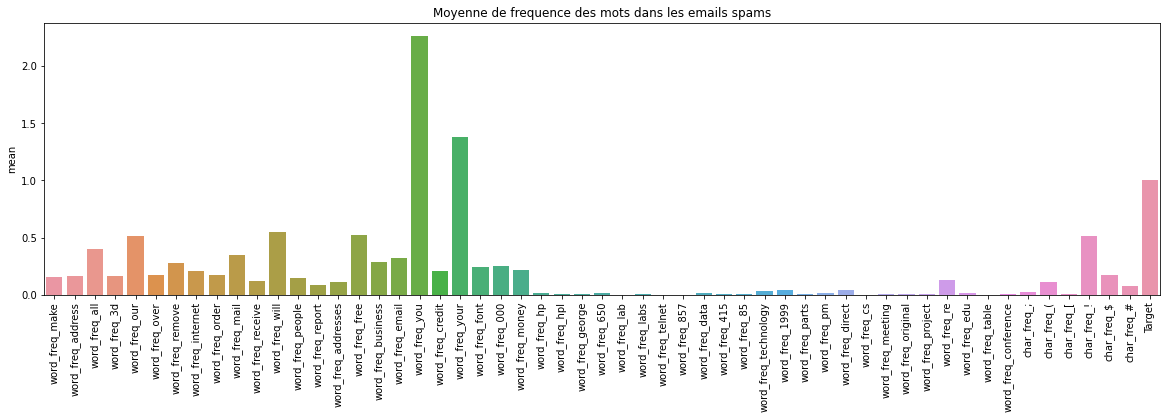

In [100]:
plt.figure(figsize=(20, 5)) 
plt.title('Moyenne de frequence des mots dans les emails spams')
sn.barplot(data_D_0.index, data_D_1['mean'])
plt.xticks(rotation= 90)

Nous observons que les mots qui apparaissent le plus dans un mail spam sont « you », « your », « will », « our »

Nous voyons ici de manière logique que les mots qui apparaissent en moyenne le plus sont des mots courants ou des mots propres à l’utilisateur comme sont prénom.

Nous avons donc choisi d'afficher les mots qui apparaissaient le plus en moyenne dans les spams moins ceux dans les non spams. Cela nous permet d'afficher les mots en moyennes qui apparaissent exlusivement dans les spams

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text major ticklabel objects>)

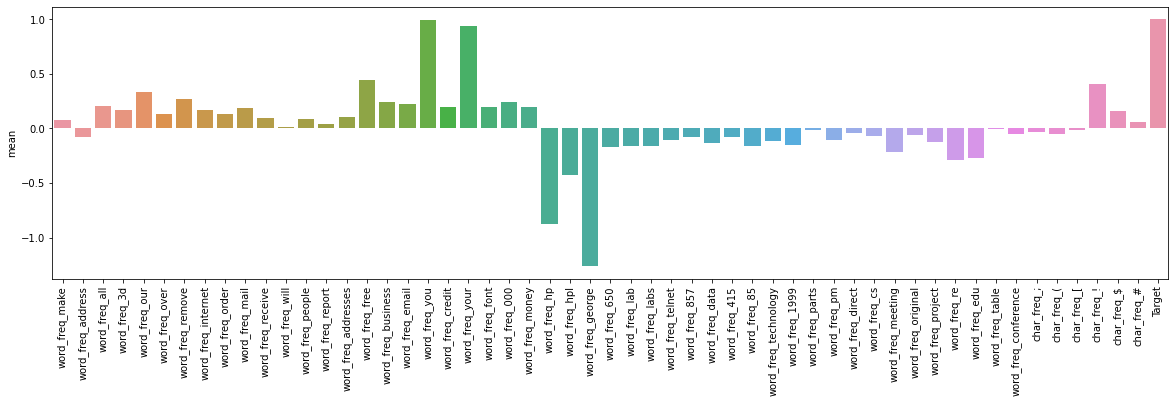

In [101]:
plt.figure(figsize=(20, 5)) 

sn.barplot(data_D_0.index, data_D_1['mean']-data_D_0['mean'])

plt.xticks(rotation= 90)


Ainsi nous observons que les hors mis les mots "you" et "your" le mots "free" et le caractère "!" apparaissent particulièrement dans les mails spams

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text major ticklabel objects>)

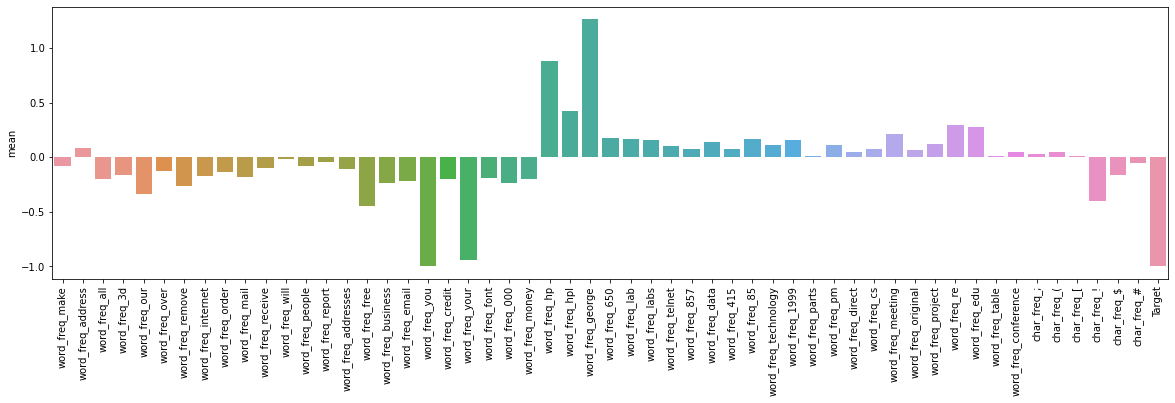

In [102]:
plt.figure(figsize=(20, 5)) 

sn.barplot(data_D_0.index, data_D_0['mean']-data_D_1['mean'])

plt.xticks(rotation= 90)

On observe ici que les mots "hp", "hpl" "george et "re" apparaissent en moyenne speicifiquement dans les mails non spams

Nous avons effectué dans un deuxième temps une visualisation pour voir quels était les mots propres aux mails spams et non spams.
Ainsi nous observons que les mots « cs », « george », « lab », « 857 », « meeting » apparaissent respectivement 1305, 815, 237, 149, 88 fois plus dans non spam par rapport au spams

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]), <a list of 57 Text major ticklabel objects>)

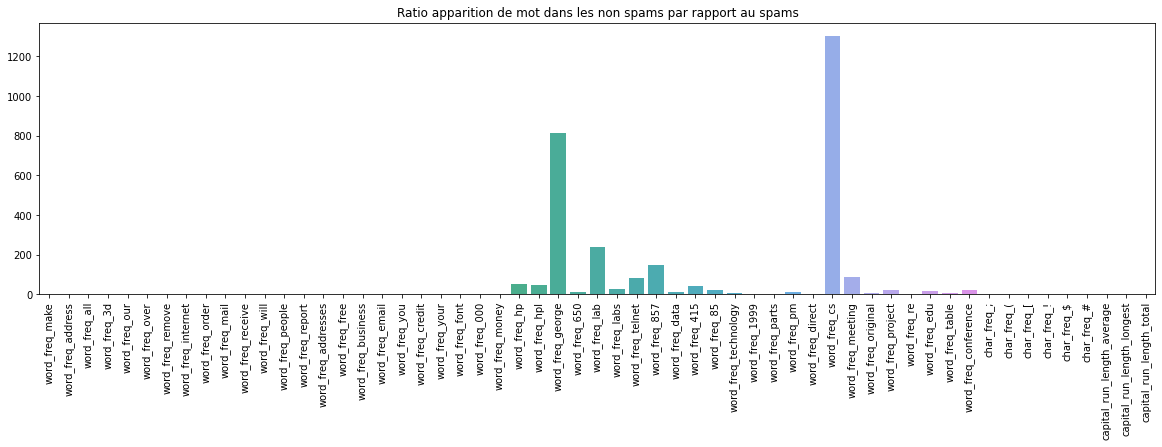

In [103]:
#word_freq_cs : 1305.1209469153519
#word_freq_george : 815.8935754147157
#word_freq_lab : 237.889468690702
#word_freq_857 : 149.0202539760066
#word_freq_meeting : 88.68073102720136
list_1 = []
list_2= []
for column in data.columns :
  if(column != 'Target'):
    list_1.append(data[data['Target']== 0][column].mean() / data[data['Target']== 1][column].mean())
    list_2.append(column)
    #print(column + ' : ' + str(data[data['Target']== 0][column].mean() / data[data['Target']== 1][column].mean()))

plt.figure(figsize=(20, 5)) 
plt.title('Ratio apparition de mot dans les non spams par rapport au spams')
sn.barplot(list_2, list_1)
plt.xticks(rotation= 90)


Nous observons par ailleurs que les mots 3d, remove, 000 qui sont respectivement 185,29 et 34 fois plus fréquent dans des mails de spam.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]), <a list of 57 Text major ticklabel objects>)

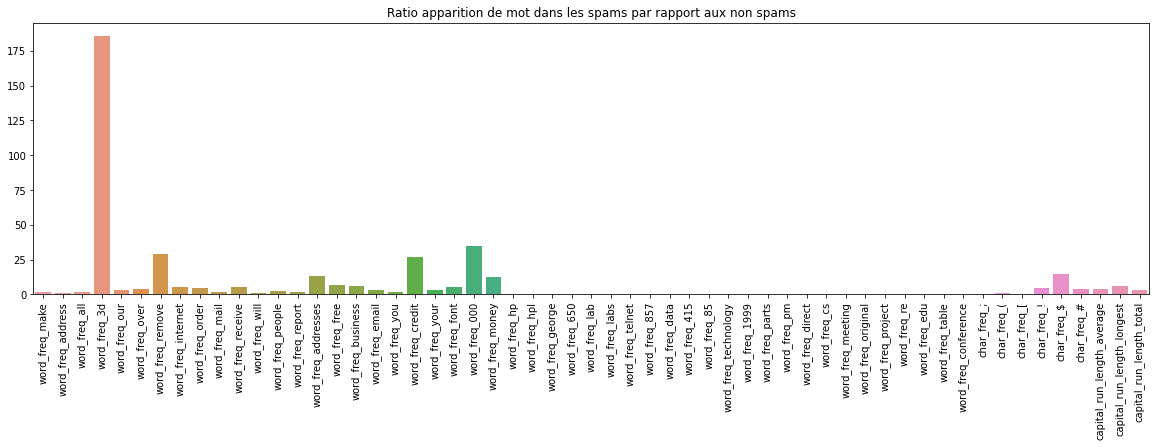

In [104]:
#word_freq_cs : 1305.1209469153519
#word_freq_george : 815.8935754147157
#word_freq_lab : 237.889468690702
#word_freq_857 : 149.0202539760066
#word_freq_meeting : 88.68073102720136
list_1 = []
list_2= []
for column in data.columns :
  if(column != 'Target'):
    list_1.append(data[data['Target']== 1][column].mean() / data[data['Target']== 0][column].mean())
    list_2.append(column)
    #print(column + ' : ' + str(data[data['Target']== 0][column].mean() / data[data['Target']== 1][column].mean()))

plt.figure(figsize=(20, 5)) 
plt.title('Ratio apparition de mot dans les spams par rapport aux non spams')
sn.barplot(list_2, list_1)
plt.xticks(rotation= 90)

# Modèles

In [105]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state = 700192)
np_data = train[['word_freq_make' ,	'word_freq_address', 	'word_freq_all', 	'word_freq_3d', 	'word_freq_our', 	'word_freq_over', 	'word_freq_remove', 	'word_freq_internet', 	'word_freq_order', 	'word_freq_mail', 	'word_freq_receive', 	'word_freq_will', 	'word_freq_people', 	'word_freq_report', 	'word_freq_addresses', 	'word_freq_free', 	'word_freq_business', 	'word_freq_email', 	'word_freq_you' ,	'word_freq_credit', 	'word_freq_your', 	'word_freq_font', 	'word_freq_000', 	'word_freq_money', 	'word_freq_hp', 	'word_freq_hpl', 	'word_freq_george', 	'word_freq_650', 	'word_freq_lab' , 	'word_freq_labs', 	'word_freq_telnet' ,	'word_freq_857' ,	'word_freq_data', 	'word_freq_415' ,	'word_freq_85', 	'word_freq_technology', 	'word_freq_1999', 	'word_freq_parts', 	'word_freq_pm', 	'word_freq_direct', 	'word_freq_cs', 	'word_freq_meeting' ,	'word_freq_original', 	'word_freq_project', 	'word_freq_re',	'word_freq_edu' ,	'word_freq_table' ,	'word_freq_conference', 	'char_freq_;', 	'char_freq_(' ,	'char_freq_[' ,	'char_freq_!' ,	'char_freq_$' ,	'char_freq_#' ,	'capital_run_length_average', 	'capital_run_length_longest', 	'capital_run_length_total']].to_numpy()

np_target = train['Target'].tolist()


np_test_data = test[['word_freq_make' ,	'word_freq_address', 	'word_freq_all', 	'word_freq_3d', 	'word_freq_our', 	'word_freq_over', 	'word_freq_remove', 	'word_freq_internet', 	'word_freq_order', 	'word_freq_mail', 	'word_freq_receive', 	'word_freq_will', 	'word_freq_people', 	'word_freq_report', 	'word_freq_addresses', 	'word_freq_free', 	'word_freq_business', 	'word_freq_email', 	'word_freq_you' ,	'word_freq_credit', 	'word_freq_your', 	'word_freq_font', 	'word_freq_000', 	'word_freq_money', 	'word_freq_hp', 	'word_freq_hpl', 	'word_freq_george', 	'word_freq_650', 	'word_freq_lab' , 	'word_freq_labs', 	'word_freq_telnet' ,	'word_freq_857' ,	'word_freq_data', 	'word_freq_415' ,	'word_freq_85', 	'word_freq_technology', 	'word_freq_1999', 	'word_freq_parts', 	'word_freq_pm', 	'word_freq_direct', 	'word_freq_cs', 	'word_freq_meeting' ,	'word_freq_original', 	'word_freq_project', 	'word_freq_re',	'word_freq_edu' ,	'word_freq_table' ,	'word_freq_conference', 	'char_freq_;', 	'char_freq_(' ,	'char_freq_[' ,	'char_freq_!' ,	'char_freq_$' ,	'char_freq_#' ,	'capital_run_length_average', 	'capital_run_length_longest', 	'capital_run_length_total']].to_numpy()


np_test_target = test['Target'].tolist()

##KNeighborsClassifier
Nous avons premièrement testé un modele de classification des voisins les plus proches sur l'ensemble de nos attributs ce qui nous a rendu un model avec une précision de 80%

In [106]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(np_data, np_target)
# Predict and print the result


#result=knn.predict([data.iloc[94].tolist()[:-1]])

c = 0
for i in range(0, len(np_test_data)):
  if(knn.predict([np_test_data[i]]) == np_test_target[i]):
    c += 1

print(c/len(np_test_data) *100)

80.21739130434783


## Clustering
Notre second model de classification à été un système de clustering basé sur un algorithme nommé k-means. 
Il consiste à diviser les éléments en un nombre de groupe fixé (en l'occurence deux spams ou non-spams).
Il n'a qu'une précision de 65%

In [107]:
from sklearn import cluster
k=2
k_means = cluster.KMeans(k)
k_means.fit(np_data)

c = 0
for i in range(0, len(np_test_data)):
  if(k_means.predict([np_test_data[i]]) == np_test_target[i]):
    c += 1

print(c/len(np_test_data) *100)

65.76086956521739


# Regression Linéaire
Finalement, nous avons opté pour une regression linéaire qui sans amélioration nous obtenait une précision de 93%. 
Une precision aussi élevée sans 'feature engineering' s'explique par le fait que les données que nous utilisons ont déja été choisi par précaution.
En effet, la donnée brut, à savoir les mails n'était pas à disposition dans ce cas donc les données que nous avons ont déja subit du feature engineering.


In [108]:
from sklearn import svm

clf_base = svm.LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)



clf_base.fit(np_data, np_target)

c = 0
for i in range(0, len(np_test_data)):
  if(clf_base.predict([np_test_data[i]]) == np_test_target[i]):
    c += 1

print(c/len(np_test_data))

0.9326086956521739


# Amélioration des modèles


# Normalisation des données
Notre seconde tentative d'amélioration des performances de nos modeles aura été de normaliser les données.

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(np_data)
scaled_data = scaler.transform(np_data)
scaled_test_data = scaler.transform(np_test_data)

print(scaled_data)


[[-0.34579714 -0.16938423 -0.55220453 ... -0.10897116 -0.22606608
  -0.46841766]
 [-0.34579714 -0.16938423 -0.55220453 ... -0.14472982 -0.25033002
  -0.47703942]
 [-0.34579714  0.24004547 -0.55220453 ... -0.13310825 -0.23091887
  -0.39427056]
 ...
 [-0.34579714 -0.16938423  1.25965741 ... -0.09262945 -0.02710177
  -0.33736697]
 [-0.34579714 -0.16938423  2.5538445  ... -0.10450133 -0.19694935
  -0.42703323]
 [ 1.21197861  0.53574469  1.29947855 ...  1.86047269  2.82148485
   0.79380742]]


## Regression Lineaire
Une fois les données normalisées le modele de régression linéaire ne change presque pas de précision 

In [110]:
clf.fit(scaled_data, np_target)

c = 0
for i in range(0, len(scaled_test_data)):
  if(clf.predict([scaled_test_data[i]]) == np_test_target[i]):
    c += 1

print(c/len(np_test_data) )
 
 

0.9315217391304348


##Clustering
Le clustering descend jusqu'à 38%.

C'est clairement pas le bon model pour ce dataset. Le clustering est plus utiles lors de classification avec une target ayant plus de valeur possible.

In [111]:
from sklearn import cluster
k=2
k_means = cluster.KMeans(k)
k_means.fit(scaled_data)

c = 0
for i in range(0, len(scaled_test_data)):
  if(k_means.predict([scaled_test_data[i]]) == np_test_target[i]):
    c += 1

print(c/len(np_test_data))


0.6184782608695653


##KNeighborsClassifier 
Le modele KNeighbors lui est encore une fois plus performant apres la normalisation des données. La normalisation des données nous à donné une précision de 91%.



In [112]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(scaled_data, np_target)
# Predict and print the result
c = 0
for i in range(0, len(scaled_test_data)):
  if(knn.predict([scaled_test_data[i]]) == np_test_target[i]):
    c += 1

print(c/len(np_test_data) )

0.9119565217391304


#Subset de features 

Dans l'optique d'améliorer la précision de nos modeles nous avons fait appel à la méthode classique des moindres carrés (modèle de régression) pour déterminer dans quelle mesure chaque colonne impactait les chances d'un mail d'être du spams ou non en ce concentrant sur ce qu'on appelle les p-value.

In [113]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from scipy import stats

X = data[['word_freq_make' ,	'word_freq_address', 	'word_freq_all', 	'word_freq_3d', 	'word_freq_our', 	'word_freq_over', 	'word_freq_remove', 	'word_freq_internet', 	'word_freq_order', 	'word_freq_mail', 	'word_freq_receive', 	'word_freq_will', 	'word_freq_people', 	'word_freq_report', 	'word_freq_addresses', 	'word_freq_free', 	'word_freq_business', 	'word_freq_email', 	'word_freq_you' ,	'word_freq_credit', 	'word_freq_your', 	'word_freq_font', 	'word_freq_000', 	'word_freq_money', 	'word_freq_hp', 	'word_freq_hpl', 	'word_freq_george', 	'word_freq_650', 	'word_freq_lab' , 	'word_freq_labs', 	'word_freq_telnet' ,	'word_freq_857' ,	'word_freq_data', 	'word_freq_415' ,	'word_freq_85', 	'word_freq_technology', 	'word_freq_1999', 	'word_freq_parts', 	'word_freq_pm', 	'word_freq_direct', 	'word_freq_cs', 	'word_freq_meeting' ,	'word_freq_original', 	'word_freq_project', 	'word_freq_re',	'word_freq_edu' ,	'word_freq_table' ,	'word_freq_conference', 	'char_freq_;', 	'char_freq_(' ,	'char_freq_[' ,	'char_freq_!' ,	'char_freq_$' ,	'char_freq_#' ,	'capital_run_length_average', 	'capital_run_length_longest', 	'capital_run_length_total']].to_numpy()

y = data['Target'].tolist()

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     101.4
Date:                Mon, 11 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:23:00   Log-Likelihood:                -1344.3
No. Observations:                4600   AIC:                             2805.
Df Residuals:                    4542   BIC:                             3178.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2001      0.012     17.372      0.0

Nous avons relevé les colonnes avec les p-value les plus elevés afin de les retirer du dataset.

In [114]:

data
count = 1
liste = []
for i in data:
  if(count not in [ 10, 11, 13, 14, 15, 28, 29, 31, 32, 34, 35 , 36 , 37, 38, 39, 40,41, 50, 51, 54, 55, 56 , 58]):
    liste.append(i)
  
  count +=1

print(liste)


['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_will', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_labs', 'word_freq_data', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_!', 'char_freq_$', 'capital_run_length_total']


In [115]:
np_data = train[liste].to_numpy()
np_test_data = test[liste].to_numpy()


##KNeighborsClassifier 
Nous avons remarqué qu'en excluant les colonnes qui selon notre étude de corrélation précédente n'avais que très peu d'impact sur nos prédictions, la classification KNN s'est améliorée en passant à environ 81% de précision au lieu de 78%.

In [116]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(np_data, np_target)
# Predict and print the result
c = 0
for i in range(0, len(np_test_data)):
  if(knn.predict([np_test_data[i]]) == np_test_target[i]):
    c += 1

print(c/len(np_test_data) * 100)

80.76086956521739


# Clustering
A priori enlever les colonnes en questions n'a pas vraiment aidé ce modèle qui est passé à 66.09% soit une legere progression mais qui reste négligeable. 

In [117]:
from sklearn import cluster
k=2
k_means = cluster.KMeans(k)
k_means.fit(np_data)

c = 0
for i in range(0, len(np_test_data)):
  if(k_means.predict([np_test_data[i]]) == np_test_target[i]):
    c += 1

print(c/len(np_test_data) * 100)

66.08695652173913


#Linear Regression

En revanche la regression linéaire semble arrivé à une précision de 92.93%, ce qui est théoriquement impossible. Cela doit être dû au fait que le dataset à été consu sur-mesure en analysant la présence de mot stratégique étant donné qu'on n'analyse que les mails d'une seule personne.

In [118]:
from sklearn import svm

clf = svm.LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

clf.fit(np_data, np_target)

c = 0
for i in range(0, len(np_test_data)):
  if(clf.predict([np_test_data[i]]) == np_test_target[i]):
    c += 1

print(c/len(np_test_data)* 100)

92.93478260869566


Etant donné que la regression linéaire sans modification du dataset est le modele le plus precis nous l'avons exporter grâce au module pickle pour l'intégré dans notre api.

In [119]:
import pickle
pickle.dump(clf_base, open('final_prediction.pickle', 'wb'))